In [8]:
from pyibl import Agent
from random import random
a = Agent(["button", "illuminated"], default_utility=5)
left = { "button": "left", "illuminated": False }
right = { "button": "right", "illuminated": False }

In [9]:
def push_button():
    if random() <= 0.5:
        left["illuminated"] = True
    else:
        left["illuminated"] = False
    right["illuminated"] = not left["illuminated"]
    result = a.choose([left, right])
    reward = 1 if result["button"] == "left" else 2
    if result["illuminated"]:
        reward *= 2
    a.respond(reward)
    return result

push_button()

{'button': 'left', 'illuminated': False}

In [10]:
a.reset()
results = {'left': 0, 'right': 0, True: 0, False: 0}
for _ in range(2000):
    result = push_button()
    results[result["button"]] += 1
    results[result["illuminated"]] += 1

results

{'left': 522, 'right': 1478, True: 1533, False: 467}

In [22]:
import time 
import random
from speedyibl import Agent 
TARGETS = [ [ { "payment": 2, "penalty":  -1, "monitored_probability": 0.22 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.51 },
              { "payment": 9, "penalty":  -9, "monitored_probability": 0.42 },
              { "payment": 9, "penalty": -10, "monitored_probability": 0.40 },
              { "payment": 2, "penalty":  -6, "monitored_probability": 0.08 },
              { "payment": 5, "penalty":  -5, "monitored_probability": 0.36 } ],
            [ { "payment": 5, "penalty":  -3, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.48 },
              { "payment": 7, "penalty":  -6, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -9, "monitored_probability": 0.37 },
              { "payment": 5, "penalty":  -7, "monitored_probability": 0.27 },
              { "payment": 2, "penalty":  -4, "monitored_probability": 0.05 } ],
            [ { "payment": 3, "penalty":  -3, "monitored_probability": 0.30 },
              { "payment": 9, "penalty":  -4, "monitored_probability": 0.60 },
              { "payment": 6, "penalty":  -6, "monitored_probability": 0.40 },
              { "payment": 5, "penalty":  -8, "monitored_probability": 0.29 },
              { "payment": 3, "penalty":  -6, "monitored_probability": 0.20 },
              { "payment": 2, "penalty":  -2, "monitored_probability": 0.20 } ],
            [ { "payment": 4, "penalty":  -3, "monitored_probability": 0.37 },
              { "payment": 6, "penalty":  -3, "monitored_probability": 0.51 },
              { "payment": 7, "penalty":  -7, "monitored_probability": 0.40 },
              { "payment": 5, "penalty": -10, "monitored_probability": 0.24 },
              { "payment": 5, "penalty":  -9, "monitored_probability": 0.26 },
              { "payment": 3, "penalty":  -4, "monitored_probability": 0.23 } ] ]

COVERAGE = [ [ { 2, 6 }, { 2, 4 }, { 2, 5 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 4 }, { 2, 6 },
               { 2, 6 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 4 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 2, 4 }, { 3, 6 },
               { 1, 3 }, { 2, 4 }, { 3, 6 }, { 2, 4 }, { 1, 3 } ],
             [ { 2, 5 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 2, 4 }, { 1, 3 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 2, 5 }, { 1, 3 }, { 1, 3 },
               { 1, 3 }, { 2, 5 }, { 2, 4 }, { 2, 4 }, { 1, 3 },
               { 1, 3 }, { 2, 4 }, { 2, 4 }, { 3, 6 }, { 2, 5 } ],
             [ { 2, 5 }, { 3, 6 }, { 2, 4 }, { 2, 5 }, { 2, 5 },
               { 2, 6 }, { 2, 6 }, { 1, 3 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 6 }, { 2, 5 },
               { 1, 3 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 5 },
               { 2, 4 }, { 2, 4 }, { 2, 6 }, { 1, 3 }, { 2, 4 } ],
             [ { 2, 5 }, { 1, 4 }, { 3, 6 }, { 2, 6 }, { 1, 3 },
               { 1, 4 }, { 1, 3 }, { 2, 5 }, { 2, 6 }, { 1, 3 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 1, 4 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 1, 4 }, { 1, 3 }, { 2, 5 },
               { 3, 6 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 4 } ] ]

TRAINING_COVERAGE = [ { 2, 5 }, { 2, 4 }, { 1 , 3 }, { 1, 3 }, { 1, 3 } ]

SIGNALS = [ [ { 3, 4 }, { 3, 6 }, { 3, 6 }, { 3, 5, 6 }, { 2, 6 },
              { 3, 6 }, { 2, 4}, { 2, 6 }, { 3, 6 }, { 1, 3, 4 },
              { 3, 4 }, { 1, 3 }, { 4, 6 }, { 5}, { 3, 6 },
              { 2, 4 }, { 5 }, { 3 }, { 6 }, { 2, 4 },
              { 2, 4 }, set(), {2, 4, 5 }, { 3 }, { 5, 6 } ],
            [ { 3, 4 }, { 2, 4 }, { 2, 4, 5 }, { 4, 5 }, { 4, 5 },
              { 1, 3, 6 }, { 2 }, { 3 }, { 5 }, set(),
              { 2, 5 }, { 2, 5 }, {3, 4 }, { 2, 5 }, { 2, 4, 5 },
              { 4, 5 }, { 3, 4 }, { 3, 5, 6 }, { 1, 5}, { 2, 5 },
              { 2 }, { 1, 5 }, { 1, 3, 5 }, { 4 }, { 1, 3, 4, 6 } ],
            [ { 1, 3, 6 }, { 2, 4 }, set(), { 1, 3, 4 }, { 3 },
              { 1, 4, 5 }, { 5 }, { 2, 4}, { 1, 3, 5 }, set(),
              { 1, 3, 5 }, { 2 }, { 2, 4, 5 }, { 5 }, { 3, 4 },
              { 2, 4, 5, 6 }, { 1, 3, 5 }, { 2, 4, 6 }, { 1, 3 }, { 1, 4 },
              { 5 }, {3 }, set(), { 2, 5, 6 }, { 1, 3, 5, 6 } ],
            [ { 6 }, { 3 }, { 2, 4 }, { 4, 5}, { 6 },
              { 3, 5 }, { 4 }, { 3, 4, 6 }, { 1, 3, 4, 5 }, { 2, 4, 6 },
              {4, 5 }, { 2, 5 }, { 1, 5, 6 }, { 2, 3, 6 }, { 2, 3 },
              { 5 }, { 2, 4, 5, 6 }, { 2, 3, 5, 6 }, { 2, 4, 5 }, { 1, 3, 4, 6 },
              { 2, 4, 5 }, { 4, 5 }, { 4 }, { 4, 5 }, { 3, 5, 6 } ] ]

TRAINING_SIGNALS = [ { 3, 4 }, {1, 3, 6 }, { 5 -}, { 2, 5 }, {2, 4, 5} ]

for clist, slist in zip(COVERAGE, SIGNALS):
    for c, s in zip(clist, slist):
        s.update(c)

TARGET_COUNT = len(TARGETS[0])
BLOCKS = len(TARGETS)
TRIALS = len(COVERAGE[0])

selection_agent = Agent(default_utility=None, mismatchPenalty = 2.5)
attack_agent = Agent(default_utility=None)
selection_agent.similarity([0,1], lambda x, y: 1 - abs(x - y) / 10)
selection_agent.similarity([2], lambda x, y: 1 - abs(x -y))

attacks = [0] * BLOCKS * TRIALS

runs = 100 # number of runs (participants)
data = []
average_time = [] # to save time 

for p in range(runs):
  total = 0
  ttime = [0]
  selection_agent.reset()
  selection_agent.similarity([0,1], lambda x, y: 1 - abs(x - y) / 10)
  selection_agent.similarity([2], lambda x, y: 1 - abs(x -y))
  
  attack_agent.reset()
  dup = random.randrange(5)
  for i in range(5):
      n = random.randrange(TARGET_COUNT)
      x = TARGETS[1][n]
      covered = n + 1 in TRAINING_COVERAGE[i]
      selection_agent.prepopulate(((x["payment"],
                                                x["penalty"],
                                                x["monitored_probability"]), i + 1),
                                                x["penalty" if covered else "payment"])
      attack_agent.prepopulate((True, n + 1 in TRAINING_SIGNALS[i]),x["penalty" if covered else "payment"])
"""      if i == dup:
        
          # x = TARGETS[1][5]
          selection_agent.prepopulate(((x["payment"],
                                      x["penalty"],
                                      x["monitored_probability"]), 6),
                                      x["penalty" if covered else "payment"])
  attack_agent.prepopulate((False,False),0)
  attack_agent.prepopulate((False,True),0)
  attack_agent.prepopulate((True,False),10)
  attack_agent.prepopulate((False,True),5)"""
  
  for b in range(BLOCKS):
    start = time.time()
    sds = [ ((x["payment"],
                                      x["penalty"],
                                      x["monitored_probability"]), i + 1)
                      for x, i in zip(TARGETS[b], range(TARGET_COUNT)) ]

    for t in range(TRIALS):
      selected = selection_agent.choose(sds)[1]
      warned = selected in SIGNALS[b][t]
      pmnt = TARGETS[b][selected - 1]["payment"]
      attack = attack_agent.choose([(True, warned),
                                    (False, warned)])[0]
      covered = selected in COVERAGE[b][t]
      if not attack:
          payoff = 0
      else:
          payoff = TARGETS[b][selected - 1]["penalty" if covered else "payment"]
          attacks[b * 25 + t] += 1
      total += payoff
      attack_agent.respond(payoff)
      selection_agent.respond(payoff)
      data.append([p+1, b+1,t+1,b*25+t+1, selected, int(warned), int(covered),int(attack),payoff, total])
      end = time.time()
      ttime.append(ttime[-1]+ end - start)
  average_time.append(ttime)



IndentationError: unexpected indent (<ipython-input-22-dae058333ffa>, line 124)

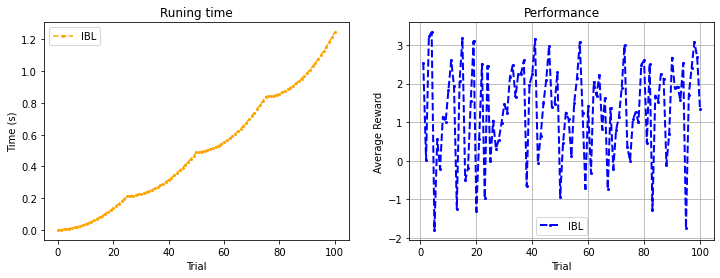

In [21]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(int('12'+str(1)))
plt.plot(range(101), np.mean(np.asarray(average_time),axis=0), 'o-', color='orange', markersize=2, linestyle='--', label='IBL')
plt.xlabel('Trial')
plt.ylabel('Time (s)')
plt.title('Runing time')
plt.legend()
plt.subplot(int('12'+str(2)))
df = pd.DataFrame(data)
plt.plot(range(1,101), df.groupby(3).mean()[8], 'o-', color='blue', markersize=2, linewidth =2, linestyle='--',label='IBL')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
count=len(data)

In [6]:
count

100000